KeyboardInterrupt: 

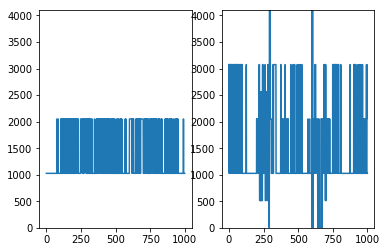

In [2]:
%matplotlib inline
import pylab as pl
from IPython import display
from pynq import Overlay

# Load the driver and the bitstream
ol = Overlay('MicDriver_dual_z2.bit')
right = ol.PMODMic_1
left = ol.PMODMic_0
ol.download()
    
# Keep sampling from the microphone
samplesl = [left.read(0) for _ in range(1000)]
samplesr = [right.read(0) for _ in range(1000)]
while True:
    # Plot the sample
    pl.clf()
    pl.subplot(121)
    pl.ylim(0, 4096)
    pl.plot(samplesl)
    pl.subplot(122)
    pl.ylim(0, 4096)
    pl.plot(samplesr)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    
    # Collect new sample
    samplesl = samplesl[100:]
    samplesr = samplesr[100:]
    samplesl += [left.read(0) for _ in range(100)]
    samplesr += [right.read(0) for _ in range(100)]